In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import plotly.express as px
%config Completer.use_jedi=False

In [2]:
data=pd.read_csv("../input/pubg-statisctic/PUBG.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87898 entries, 0 to 87897
Columns: 152 entries, player_name to squad_DBNOs
dtypes: float64(83), int64(68), object(1)
memory usage: 101.9+ MB


In [3]:
train=data.copy()
train.dropna(inplace=True)

columns_to_be_removed = np.arange(52,152,1)
train.drop(train.columns[columns_to_be_removed],axis=1,inplace = True)
train.drop(train.columns[[0,1]], axis = 1, inplace = True)

train.drop(columns=['solo_Revives'],inplace = True)

train.drop(columns= ['solo_DBNOs'], inplace = True)

In [4]:
standardized_data = StandardScaler().fit_transform(train)
standardized_data.shape

(87898, 48)

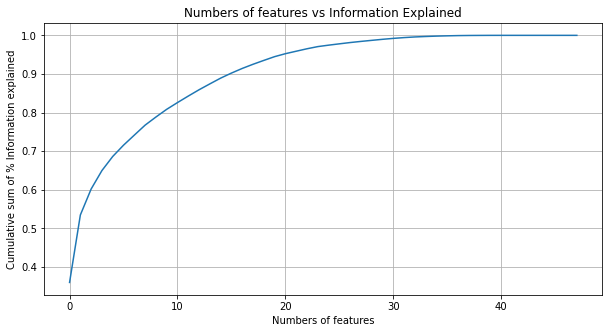

In [5]:
pca = decomposition.PCA()
pca.n_components = 48

pca_data = pca.fit_transform(standardized_data)
info_explained_by_each_feature = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_info_explained = np.cumsum(info_explained_by_each_feature)


# Plotting Graph
plt.figure(figsize = (10,5))
plt.plot(cum_info_explained)
plt.grid()
plt.title('Numbers of features vs Information Explained')
plt.xlabel('Numbers of features')
plt.ylabel('Cumulative sum of % Information explained');

In [6]:
pca = decomposition.PCA()
pca.n_components = 20
pca_data = pca.fit_transform(standardized_data)
df = pd.DataFrame(pca_data)

In [7]:
train, test = train_test_split(df,test_size = 0.2,random_state = 1)

In [8]:
k = range(1, 25)

inertias = []
for i in k:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=i, init='k-means++', random_state = 10)
    
    # Fit model to samples
    model.fit(train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


for i in range(1,24):    
    print( f'Difference between inertia is {inertias[i-1] - inertias[i]:.0f} from point {i} to {i+1} ')

Difference between inertia is 656771 from point 1 to 2 
Difference between inertia is 290192 from point 2 to 3 
Difference between inertia is 241013 from point 3 to 4 
Difference between inertia is 128266 from point 4 to 5 
Difference between inertia is 103178 from point 5 to 6 
Difference between inertia is 87476 from point 6 to 7 
Difference between inertia is 56524 from point 7 to 8 
Difference between inertia is 49238 from point 8 to 9 
Difference between inertia is 38002 from point 9 to 10 
Difference between inertia is 34083 from point 10 to 11 
Difference between inertia is 30729 from point 11 to 12 
Difference between inertia is 26248 from point 12 to 13 
Difference between inertia is 31463 from point 13 to 14 
Difference between inertia is 20601 from point 14 to 15 
Difference between inertia is 21123 from point 15 to 16 
Difference between inertia is 19018 from point 16 to 17 
Difference between inertia is 21009 from point 17 to 18 
Difference between inertia is 13092 from po

(array([1000000., 1250000., 1500000., 1750000., 2000000., 2250000.,
        2500000., 2750000., 3000000., 3250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

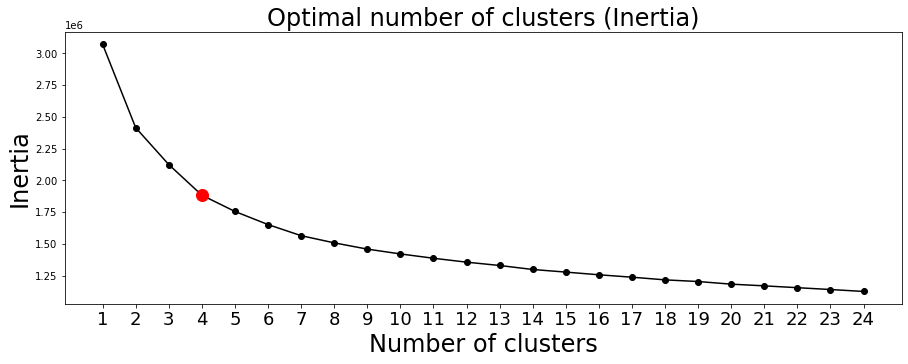

In [9]:
plt.figure(figsize = (15, 5))
plt.plot(k, inertias, '-o', color = 'black')
plt.plot(4, inertias[3], '-o', color = 'red', markersize = 12)
plt.xlabel('Number of clusters', fontsize = 24)                    
plt.ylabel('Inertia', fontsize = 24)
plt.title('Optimal number of clusters (Inertia)', fontsize = 24)
plt.xticks(k, fontsize = 18)
plt.yticks(fontsize = 10)

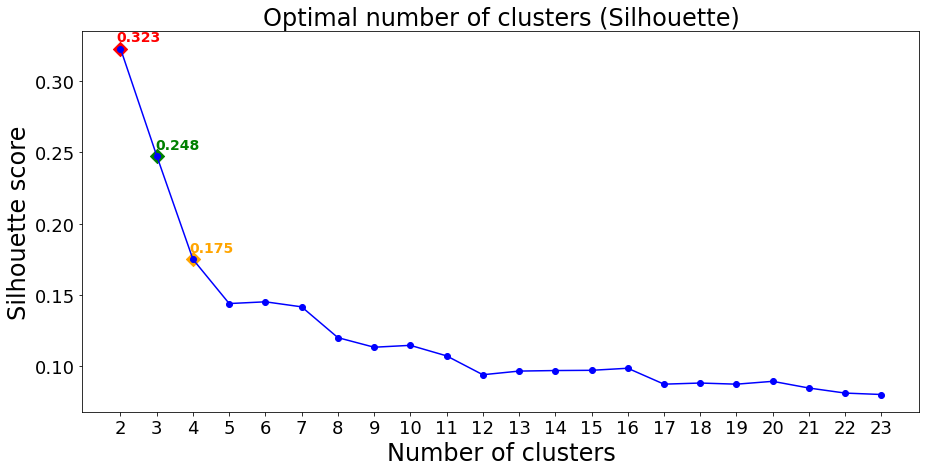

In [10]:
ks = range(2, 24)
score = []

# Silhouette Method
for k in ks:
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state = 555).fit(train)
    ss = metrics.silhouette_score(train, kmeans.labels_, sample_size = 10000)
    score.append(ss)

plt.figure(figsize = (15, 7))
plt.plot(ks, score, '-o', color = 'blue')

# Marking Points
s = ['D', 'D', 'D' ]
col = ['red','green','orange' ]
x = np.array([2, 3, 4])
y = score[0:3]
plt.xticks(ks, fontsize = 18)
plt.yticks(fontsize = 18)

## Different Markers for first three points
for _s, c, _x, _y in zip(s, col, x, y):
    plt.scatter(_x, _y, marker=_s, c=c, s = 100)
plt.xlabel("Number of clusters", fontsize = 24)
plt.ylabel("Silhouette score", fontsize = 24)
plt.title('Optimal number of clusters (Silhouette)', fontsize = 24)

plt.text(1.90, score[0] + 0.005, str(round(score[0], 3)), size = 14, color = 'red', weight = 'semibold')

plt.text(2.97, score[1] + 0.005, str(round(score[1], 3)), size = 14, color = 'green', weight = 'semibold')

plt.text(3.90, score[2] + 0.005, str(round(score[2], 3)), size = 14, color = 'orange', weight = 'semibold')


plt.show()

obv 4 should be THE CHOSEN ONE

In [11]:
kmeans = KMeans(n_clusters = 4,init= 'k-means++',max_iter = 300, random_state=1).fit(train)
labels = kmeans.labels_
cluster_names = {0:'Beginner',1:'Professional',2:'Experienced',3:'Hacker'}

<AxesSubplot:xlabel='Name_of_Cluster', ylabel='count'>

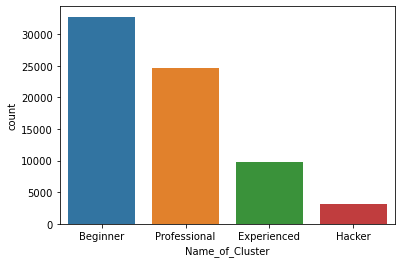

In [12]:
df_x_train = pd.DataFrame(train)
df_x_train['Clusters'] = pd.Series(labels, index=df_x_train.index)
df_x_train['Name_of_Cluster'] = df_x_train['Clusters'].map(cluster_names)
sns.countplot(x="Name_of_Cluster",data=df_x_train)

In [13]:
def predict(model,test_data):
    predict_labels = model.predict(test_data)
    df = pd.DataFrame(test_data)
    df['Cluster'] = pd.Series(predict_labels,index = df.index)
    df['Name_of_Cluster'] = df['Cluster'].map(cluster_names)
    sns.countplot(x="Name_of_Cluster",data=df)